# 实现一个神经网络  

在这个作业中我们将要使用全连接层实现一个神经网络来进行分类操作，并且我们会在CIFAR-10数据集上测试该神经网络

In [1]:
# 一些设置和初始化操作

import numpy as np
import matplotlib.pyplot as plt

from DSVC.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

我们将会使用`DSVC/classifiers/neural_net.py`这个python文件中的`TwoLayerNet`类来创建一个神经网络对象，网络的参数都被保存在网络对象中的变量`self.params`中，这个参数变量内部是key-value形式存储，其中的每个key值表示参数名称，value是numpy类型的数组。接下来，我们初始化一组模拟数据和一个模拟的模型来进行神经网络的构建。

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.
# 创建一个小型网络和一些模拟数据来检查你的模型实现
# 注意我们设置了随机种子来保证多次实验结果一致 
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# 前向传播：计算预测分数     
打开文件`DSVC/classifiers/neural_net.py`查看`TwoLayerNet.loss`方法。这个函数和我们之前在SVM和Softmax练习中写过的loss函数非常相似：使用数据data和参数weights来计算具体每个类别的score，loss和各个参数的梯度值。  

接下来请实现前向传播的第一步，需要对全部输入数据使用weights和biases来计算scores。  

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720496109664e-08


# 前向传播：计算损失    
接下来请实现该方法的第二部分，来计算数据data和正则化项的loss。

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.794120407794253e-13


# 反向传播   

实现该方法的剩余部分，这部分将计算loss对于变量`W1`, `b1`, `W2`, 和`b2`的梯度值。现在你应该已经正确的实现了前向传播算法，你可以检查你所实现的反向传播算法的正确性，通过我们提供的一个数值梯度计算函数。

In [5]:
from DSVC.gradient_check import eval_numerical_gradient

# 使用数值梯度计算方法来检查你的反向传播算法   
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2. 

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 3.865091e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# 训练网络   
为了训练网络我们应该使用在SVM和Softmax分类器中类似的随机梯度下降方法，查看方法`TwoLayerNet.train`并且补充缺失部分来实现训练过程。该方法应该和你之前在SVM和Softmax分类器使用的训练过程非常类似。同样你需要实现方法`TwoLayerNet.predict`，为了在网络训练过程中，周期性的执行预测，并且来跟踪这些预测值。    

当你实现了上述方法后，运行下面的代码来训练一个两层神经网络通过我们提供的模拟数据。你的训练loss应该小于0.2.

Final training loss:  0.01714960793873207


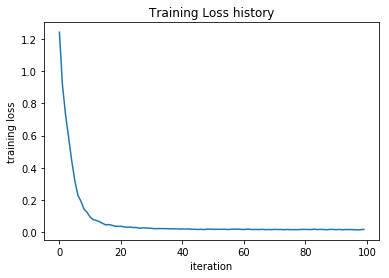

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
# 绘制loss历史   
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# 加载数据    
现在你已经实现了一个两层神经网络并且在之前的模拟数据集上通过了梯度检测，接下来请加载我们最喜欢的CIFAR-10数据集，在真实的数据集上使用你实现的算法训练一个分类器。   

In [7]:
from DSVC.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    从磁盘中加载CIFAR-10数据集，执行一些预处理操作  
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'DSVC/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    # 划分数据集为验证集，训练集和测试集   
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    # 数据归一化（均值归一化）   
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    # 将每个样本数据拉成一行的形式   
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
# 调用下列方法来获取数据并打印出它们的shape  
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# 训练一个网络  
为了训练我们的网络我们需要使用动量梯度下降方法。除此之外，随着优化的进行，我们会以一种指数型的学习率调度策略来调整我们的学习率；在每个epoch之后，我们会给学习率乘上一个衰减指数来减小学习率。   
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# 优化训练   
使用我们提供的默认参数，你应该能够在验证集上获得0.29左右的准确率，这个效果有点low，我们的训练应该存在一定的问题。    

深入了解问题的一种策略是我们在训练过程中绘制损失函数和验证准确率的图像。  
One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

另一种策略是可视化我们在网络第一层中学习到的权重，在大多数针对图像数据的神经网络中，第一层的权重在可视化时往往会显示一些可见的结构。   
Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

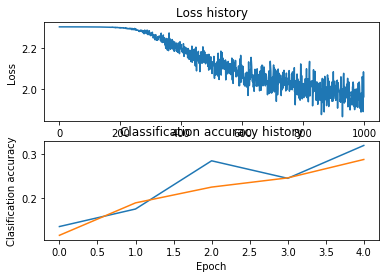

In [9]:
# Plot the loss function and train / validation accuracies
# 绘制损失函数和验证集上准确度的图像  
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

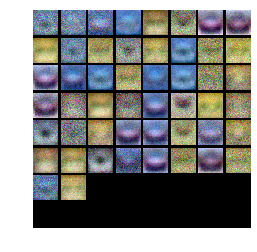

In [10]:
from DSVC.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# 调整超参数    

**问题所在**. 观察上面的可视化结果，我们看到loss曲线呈一种线性下降的趋势，这可能表明学习率太低了，此外，训练集上的准确率和验证集上的准确率之间没有明显的区别，这表明我们的模型容量太小了，我们应该增大数据规模，从另一个方面考虑，一个数据规模很大的模型可能会更容易产生过拟合的现象，这表现在训练集上的准确率和验证集上的准确率有很大的差异。   

**调整**. 调整超参数并且熟悉它们的变化会如何影响神经网络最后的性能是我们学习神经网络中的一个重要部分，因此我们希望你能够进行大量的练习。下面，你应该测试各种超参数的不同值，包括隐藏层的单元数，学习率，训练批次和正则化项系数。你可能会考虑调整学习率的衰减系数，但是你应该会发现默认值的效果最好。  

**预期结果**. 你的目标应该是在验证集上取得高于48%的分类准确率。我们得到的最佳网络在验证集上的准确率超过了52%。   

**实验**: 本次作业的目标是通过使用一个全连接神经网络在CIFAR-10数据集上获得尽可能好的分类效果。...请随意实现你自己的额外技巧来提高准确率(例如使用PCA来对数据降维，或者添加dropout，或者提取其他更有用的特征等等)。    
You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

### 张泽亿超参数调整

In [ ]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.      
# 使用验证集来调整超参数，将你的最佳模型保存在best_net变量中   
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
pass
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

In [ ]:
# visualize the weights of the best network
show_net_weights(best_net)

# 在测试集上运行   
当你完成了测试，你应该在测试集上评估你的最佳网络模型，你应该能够得到大于48%的分类准确率。    
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**当准确率超过52%时，准确率每提高1%，我们会给你额外的奖励分数**   

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [ ]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

### 许瑞洋超参数调整 

In [ ]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.      
# 使用验证集来调整超参数，将你的最佳模型保存在best_net变量中   
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
pass
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

In [ ]:
# visualize the weights of the best network
show_net_weights(best_net)

# 在测试集上运行   
当你完成了测试，你应该在测试集上评估你的最佳网络模型，你应该能够得到大于48%的分类准确率。    
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**当准确率超过52%时，准确率每提高1%，我们会给你额外的奖励分数**   

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [ ]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

### 景金龙超参数调整 

In [ ]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.      
# 使用验证集来调整超参数，将你的最佳模型保存在best_net变量中   
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
pass
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

In [ ]:
# visualize the weights of the best network
show_net_weights(best_net)

# 在测试集上运行   
当你完成了测试，你应该在测试集上评估你的最佳网络模型，你应该能够得到大于48%的分类准确率。    
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**当准确率超过52%时，准确率每提高1%，我们会给你额外的奖励分数**   

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [ ]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

### 鲍骞月超参数调整 

In [ ]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.      
# 使用验证集来调整超参数，将你的最佳模型保存在best_net变量中   
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
pass
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

In [ ]:
# visualize the weights of the best network
show_net_weights(best_net)

# 在测试集上运行   
当你完成了测试，你应该在测试集上评估你的最佳网络模型，你应该能够得到大于48%的分类准确率。    
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**当准确率超过52%时，准确率每提高1%，我们会给你额外的奖励分数**   

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [ ]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)